In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb
import re
import math
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import TextBlob

nltk.download('gutenberg') #needed to access the raw text of a book
nltk.download('punkt') #needed to tokenize sentences
nltk.download('vader_lexicon') #NLTK's vader tool relies on a sentiment lexicon!

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ANURAG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
# reading the csv data into dataframe
col_names = ['sno', 'reviews']
reviews = pd.read_csv("BA_reviews_2.csv", names = col_names, header = None)
reviews.head()

,sno,reviews
0,0,✅ Trip Verified | The airline lost my luggage...
1,1,✅ Trip Verified | We booked on the BA website...
2,2,✅ Trip Verified | First time flying with BA b...
3,3,Not Verified | You can buy sandwiches and cris...
4,4,✅ Trip Verified | This is a two-for-one revie...


In [26]:
# Function to clean the reviews
def clean_reviews(reviews):
    if isinstance(reviews, str):
        # remove all '✅ Trip Verified' from the text
        cleaned_review = re.sub(r'✅ Trip Verified', '', reviews)
        # remove all ' Not Verified' from the reviews text
        cleaned_review = re.sub(r'Not Verified ',"", cleaned_review)
        # Remove special characters and symbols
        cleaned_review = re.sub(r"\|", "", cleaned_review)
        #remove all underscores from the text
        cleaned_review = re.sub(r'\_', ' ', cleaned_review)
        # remove all numbers from the text using a regular expression
        cleaned_review = re.sub(r'[0-9]', ' ', cleaned_review)
        #remove anything else in the text that isn't a word character (letter) or a space (e.g., punctuation, special symbols, etc.)
        cleaned_review = re.sub(r'[^\w\s]', ' ', cleaned_review)
        # remove any excess whitespace
        cleaned_review = re.sub(r'\s+',' ', cleaned_review).strip()
        return cleaned_review
    else:
        return ""

In [27]:
# calling the clean reviews function to clean the data
reviews['cleaned_reviews'] = reviews.reviews.apply(clean_reviews)
print(reviews)

     sno                                            reviews  \
0      0  ✅ Trip Verified |  The airline lost my luggage...   
1      1  ✅ Trip Verified |  We booked on the BA website...   
2      2  ✅ Trip Verified |  First time flying with BA b...   
3      3  Not Verified | You can buy sandwiches and cris...   
4      4  ✅ Trip Verified |  This is a two-for-one revie...   
..   ...                                                ...   
995  995  ✅ Trip Verified |  Zagreb to London and during...   
996  996  ✅ Trip Verified |  I booked a round trip from ...   
997  997  ✅ Trip Verified |  Toronto to LHR and LGW to T...   
998  998  ✅ Trip Verified |  San Francisco to London Hea...   
999  999  ✅ Trip Verified |  London to Dublin. This was ...   

                                       cleaned_reviews  
0    The airline lost my luggage and was absolutely...  
1    We booked on the BA website round trip flights...  
2    First time flying with BA business class never...  
3    You can bu

In [5]:
import nltk
#nltk.download('stopwords')

In [28]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))|{'flight', 'airline', 'airlines', 'still', 'airways', 'service', 'seat', 'booked', 'first',
                                        'twice', 'british', 'airway', 'ba', 'passenger', 'customer','via', 'booked', 'seats', 'country', 
                                       'january', 'february', 'march', 'april', 'may', 'year', 'return', 'would', 'could', 'time',
                                       'one', 'class','airport', 'london', 'heathrow', 'seattle', 'get', 'told', 'back', 'need', 
                                       'check', 'also', 'however', 'said', 'u','n', 'passenger', 'plane', 'travelled', 'day', 'took',
                                       'travelling', 'family', 'even','cannot', 'new york','though', 'new', 'york'}
from nltk.corpus import stopwords
def remove_stopword(word):
    return word not in words

In [29]:
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].str.lower().str.split()
reviews['cleaned_reviews'] = reviews['cleaned_reviews'].apply(lambda x : ' '.join([item for item in x if item not in stop]))

In [30]:
reviews.head(20)

,sno,reviews,cleaned_reviews
0,0,✅ Trip Verified | The airline lost my luggage...,lost luggage absolutely awful throughout entir...
1,1,✅ Trip Verified | We booked on the BA website...,website round trip flights amman stop business...
2,2,✅ Trip Verified | First time flying with BA b...,flying business never boarding drinks provided...
3,3,Not Verified | You can buy sandwiches and cris...,buy sandwiches crisps expect hot meal narrow b...
4,4,✅ Trip Verified | This is a two-for-one revie...,two review covering economy business city ibiz...
5,5,✅ Trip Verified | Absolutely horrible airline....,absolutely horrible communication terrible las...
6,6,✅ Trip Verified | Having experienced delays a...,experienced delays cancellations departing usa...
7,7,✅ Trip Verified | Travelled to Heathrow to Kal...,kalamata journey days later world traveller ak...
8,8,Not Verified | This flight failed at every le...,failed every level delayed arrived destination...
9,9,Not Verified | Beware of British Airways and ...,beware marketing make believe full level rest ...


In [31]:
lemmatizer = WordNetLemmatizer()

lemmatized_reviews = []

for review in reviews.cleaned_reviews:
    tokens = word_tokenize(review)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lm_reviews = ' '.join(lemmatized_tokens)
    lemmatized_reviews.append(lm_reviews)

In [32]:
reviews['lemmatized_reviews'] = lemmatized_reviews

In [33]:
polarity_score = []
subjectivity_score = []

#get polarity and subjectivity scores for each sentence
for sentence in reviews.lemmatized_reviews:
  #the str() function is used to ensure that the input value is a string
  blob = TextBlob(str(sentence)) 
  #get polarity and subjectivity scores
  polarity, subjectivity = blob.polarity, blob.subjectivity
  print('sentence: "{}", polarity: {:.3f}, subjectivity: {:.3f}'.format(sentence, polarity, subjectivity))
  polarity_score.append(polarity)
  subjectivity_score.append(subjectivity)

sentence: "lost luggage absolutely awful throughout entire trip gave update website suck nearly impossible someone phone finally delivered luggage hotel left go u day ship u calling everyday begging bag appease phone tell fixing nothing change hotel touch tried pick bag several time called got message saying answering due many complaint call call later", polarity: -0.163, subjectivity: 0.482
sentence: "website round trip flight amman stop business delayed diverted nyc enroute husband experienced medical emergency landed nyc taken hospital stayed constant contact agent arranged ambulance transfer evening flew home confirming cancellation remaining flight agent next several week spoke many time trying obtain kind refund met contradictory explanation excuse absence meaningful discovered marked show amman active unable cancel website despite booking website phone call never returned spent minimum minute hold every phone call made email received canned reply without answer explanation possi

sentence: "future travel voucher singapore thought perfect relocate home impression simple process call book onto route previously paid previously cancelled date wrong pay top significant amount equivalent around value original redemption ticket part cash part airmiles price increase fact flying peak time extra charge meant overall paid face value online price ticket well keeping redeemed explained online price redemption price differ system work taken refund lost lot money administration fee desperate situation losing hundred pound matter cut loss least thought call centre agent previously explained working remotely manager supervision way escalate issue card detail including full card number date cvc code explained ticket receipt payment extra bag follow week later ticket detail charge card booking reference nothing called confirm call centre agent reached apologised advised escalate booking team card detail waited another week sign onto thus began cycle increasingly frequent despera

sentence: "nice agree totally comment made michael croft review today nice cancelled result low cost unreliable system senior management likely celebrating somewhere managed cut cost handling situation despicable think failure encounter day got part act together make problem bolt blue clearly investing instead focussing cost cutting boost performance bonus ceo go others top", polarity: 0.088, subjectivity: 0.623
sentence: "palma away useless system presumably team staff management issue recur frequent basis head roll preferably ceo read fatuously stupid interview alex cruz talking child guiding future air travel man manage run properly let alone try make look eco friendly comment loyal year seems slightest interest u pay full fare low without complaint patience run", polarity: -0.044, subjectivity: 0.411
sentence: "city ibiza disappointing flight cancelled without explanation presumably striking staff turn trip ruined got replacement ticket different destination different week trip bas

sentence: "business paid extra selection boeing disappointed scheduled rejected offer flying belgian air change different aircraft window selection lost husband forced sit separately booking find proof paid selected prove payment booking number changed flight spooning stranger centre isle trip planned sitting apart husband tv work staff nicer find alternative complaint offered voucher next despite sending two detailed message received response completely inadequate attendant delivering flight paid dealing complaint", polarity: -0.095, subjectivity: 0.360
sentence: "vancouver chose fly good family traveling month old alone needed booking process smooth stressful call multiple time improve call center flight great staff ground air helpful everything ensure ok crew came around often drink food ok given cot baby originally wanted britax talked saying baby comfortable cot nope big lie straight asked switched asleep minute toilet economy order least hour reached destination everyone used bus

In [34]:
# appending the scores to reviews data
reviews['polarity'] = polarity_score
reviews['subjectivity'] = subjectivity_score

In [35]:
reviews.head()

,sno,reviews,cleaned_reviews,lemmatized_reviews,polarity,subjectivity
0,0,✅ Trip Verified | The airline lost my luggage...,lost luggage absolutely awful throughout entir...,lost luggage absolutely awful throughout entir...,-0.162879,0.481818
1,1,✅ Trip Verified | We booked on the BA website...,website round trip flights amman stop business...,website round trip flight amman stop business ...,0.095167,0.382333
2,2,✅ Trip Verified | First time flying with BA b...,flying business never boarding drinks provided...,flying business never boarding drink provided ...,0.000000,0.033333
3,3,Not Verified | You can buy sandwiches and cris...,buy sandwiches crisps expect hot meal narrow b...,buy sandwich crisp expect hot meal narrow body...,0.100000,0.555556
4,4,✅ Trip Verified | This is a two-for-one revie...,two review covering economy business city ibiz...,two review covering economy business city ibiz...,0.336310,0.543452


In [36]:
reviews['cleaned_reviews'].isna().sum()

0

In [37]:
# function for categorizing the reviews
def get_sentiment_category(polarity_score):
    if polarity_score >= 0.6:
        return 'Strongly Positive'
    elif 0 < polarity_score < 0.6:
        return 'Positive'
    elif -0.6 < polarity_score < 0:
        return 'Negative'
    elif polarity_score <= -0.6:
        return 'Strongly Negative'
    else:
        return 'Neutral'


In [38]:
reviews['sentiment_category'] = reviews['polarity'].apply(get_sentiment_category)

In [39]:
reviews.head(20)

,sno,reviews,cleaned_reviews,lemmatized_reviews,polarity,subjectivity,sentiment_category
0,0,✅ Trip Verified | The airline lost my luggage...,lost luggage absolutely awful throughout entir...,lost luggage absolutely awful throughout entir...,-0.162879,0.481818,Negative
1,1,✅ Trip Verified | We booked on the BA website...,website round trip flights amman stop business...,website round trip flight amman stop business ...,0.095167,0.382333,Positive
2,2,✅ Trip Verified | First time flying with BA b...,flying business never boarding drinks provided...,flying business never boarding drink provided ...,0.000000,0.033333,Neutral
3,3,Not Verified | You can buy sandwiches and cris...,buy sandwiches crisps expect hot meal narrow b...,buy sandwich crisp expect hot meal narrow body...,0.100000,0.555556,Positive
4,4,✅ Trip Verified | This is a two-for-one revie...,two review covering economy business city ibiz...,two review covering economy business city ibiz...,0.336310,0.543452,Positive
5,5,✅ Trip Verified | Absolutely horrible airline....,absolutely horrible communication terrible las...,absolutely horrible communication terrible las...,-0.350000,0.777778,Negative
6,6,✅ Trip Verified | Having experienced delays a...,experienced delays cancellations departing usa...,experienced delay cancellation departing usa e...,0.700000,0.766667,Strongly Positive
7,7,✅ Trip Verified | Travelled to Heathrow to Kal...,kalamata journey days later world traveller ak...,kalamata journey day later world traveller aka...,0.090278,0.451389,Positive
8,8,Not Verified | This flight failed at every le...,failed every level delayed arrived destination...,failed every level delayed arrived destination...,0.032143,0.570238,Positive
9,9,Not Verified | Beware of British Airways and ...,beware marketing make believe full level rest ...,beware marketing make believe full level rest ...,-0.011735,0.259694,Negative


In [40]:
# Occurrences of each sentiment category
category_counts = reviews['sentiment_category'].value_counts()

# Print the category counts
print(category_counts)


Positive             624
Negative             339
Strongly Positive     16
Neutral               14
Strongly Negative      7
Name: sentiment_category, dtype: int64


In [41]:
#!pip install wordcloud

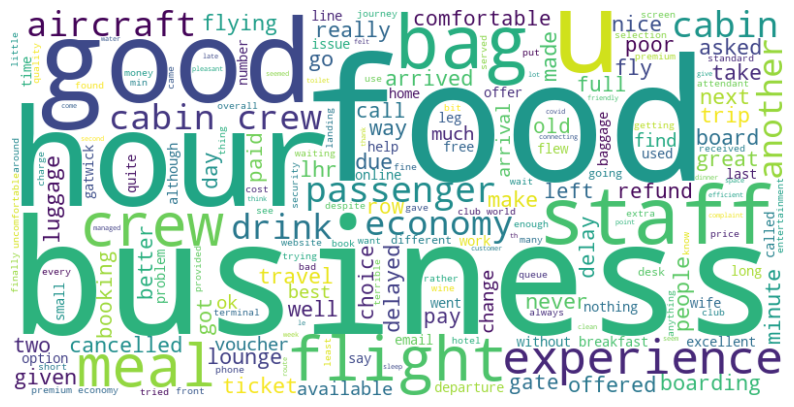

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all the reviews into a single string
all_reviews = ' '.join(reviews['lemmatized_reviews'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

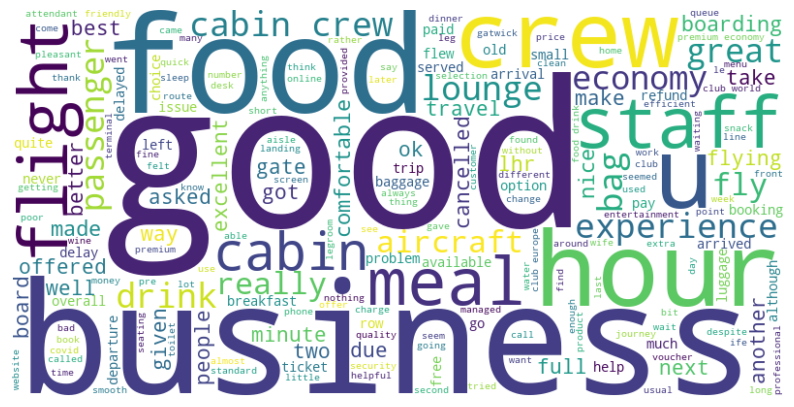

In [43]:
# wordcloud for positive reviews
positive_reviews = reviews[reviews['polarity'] > 0]
positive = ' '.join(positive_reviews['lemmatized_reviews'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

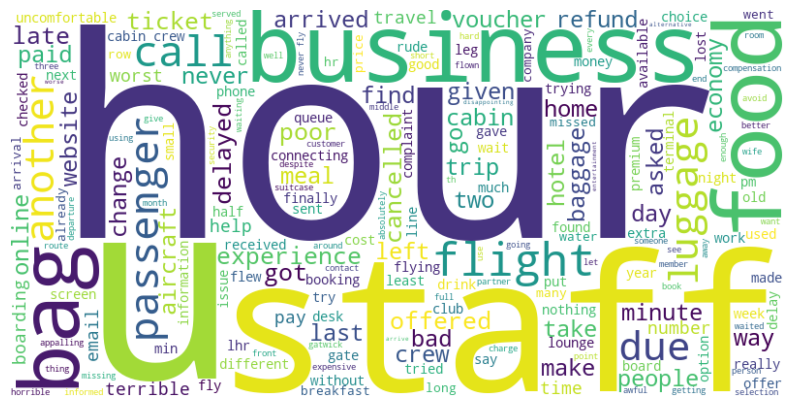

In [44]:
# Wordcloud for negative reviews
negative_reviews = reviews[reviews['polarity'] < 0]
negative = ' '.join(negative_reviews['lemmatized_reviews'].astype(str))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:ylabel='None'>

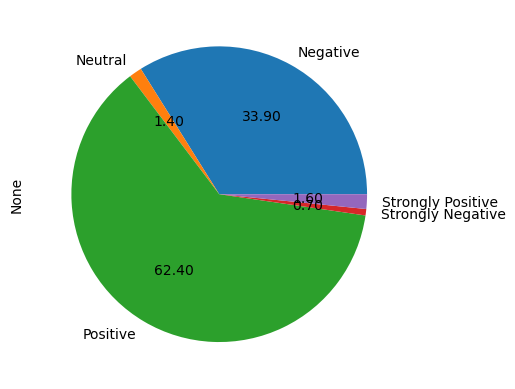

In [45]:
reviews.groupby('sentiment_category').size().plot(kind='pie', autopct='%.2f')

In [46]:
from nltk.probability import FreqDist
from nltk.util import ngrams

#tokenize the negative reviews
negative_tokens = word_tokenize(negative)

# ngrams
bigram_tokens = list(ngrams(negative_tokens, 2))

# Calculate the frequency of each bigram
word_freq = FreqDist(bigram_tokens)

# Print the most common words and their frequencies
for words, freq in word_freq.most_common(50):
    print(f'{words}: {freq}')

('cabin', 'crew'): 38
('never', 'fly'): 20
('worst', 'experience'): 17
('premium', 'economy'): 16
('delayed', 'hour'): 15
('entertainment', 'system'): 15
('long', 'haul'): 13
('bottle', 'water'): 13
('leg', 'room'): 12
('hand', 'luggage'): 12
('club', 'europe'): 12
('food', 'drink'): 11
('boarding', 'pas'): 10
('hour', 'later'): 10
('los', 'angeles'): 10
('day', 'later'): 10
('worst', 'ever'): 9
('hour', 'late'): 9
('missed', 'connecting'): 9
('experience', 'ever'): 9
('hour', 'delay'): 8
('non', 'existent'): 8
('ground', 'staff'): 8
('two', 'hour'): 8
('another', 'hour'): 8
('business', 'experience'): 8
('club', 'world'): 8
('last', 'minute'): 7
('paid', 'extra'): 7
('spent', 'hour'): 7
('much', 'better'): 7
('phone', 'number'): 7
('inflight', 'entertainment'): 7
('food', 'awful'): 7
('lost', 'luggage'): 6
('several', 'time'): 6
('minute', 'late'): 6
('far', 'worst'): 6
('u', 'hour'): 6
('hour', 'half'): 6
('almost', 'hour'): 6
('waste', 'money'): 6
('bad', 'experience'): 6
('low', 'c